In [1]:
# Dumb Game of Life :)

# RULES:
# For a space that is 'populated':
#     Each cell with one or no neighbors dies, as if by solitude.
#     Each cell with four or more neighbors dies, as if by overpopulation.
#     Each cell with two or three neighbors survives.

# For a space that is 'empty' or 'unpopulated'
#     Each cell with three neighbors becomes populated.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

In [3]:
def next_board(m):
    r = m.copy()
    for i in range(len(m)):
        for j in range(len(m[i])):
            pi = i-1
            pj = j-1
            si = i+1 if i+1 < len(m) else 0
            sj = j+1 if j+1 < len(m[i]) else 0

            neighbor_indexes = [(pi,pj),(pi,j),(pi,sj),
                                (i,pj),        (i,sj),
                                (si,pj),(si,j),(si,sj)]
            neighbor_values = [m[i][j] for i,j in neighbor_indexes]
            neighbor_counts = neighbor_values.count(1)
            if m[i][j] == 0:
                if neighbor_counts == 3:
                    r[i][j] = 1
            else:
                if neighbor_counts < 2:
                    r[i][j] = 0
                elif neighbor_counts < 4:
                    pass
                else:
                    r[i][j] = 0
    return r

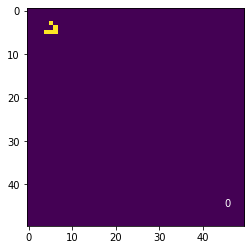

In [4]:
if __name__ == '__main__':
    m = np.zeros((50,50))
    
    # glider
    x,y = 5,5
    m[y][x-1] = 1
    m[y][x] = 1
    m[y][x+1] = 1
    m[y-1][x+1] = 1
    m[y-2][x] = 1
    
    fig, ax = plt.subplots()
    
    def animate(i):
        global m
        if i != 0:
            ax.clear()
            m = next_board(m)
        ax.imshow(m)
        ax.text(45,45,i,fontdict={'color':  'white'})

    ani = animation.FuncAnimation(fig,animate,interval=100)

In [ ]:
HTML(ani.to_html5_video())